In [1]:
import numpy as np
import pandas as pd
import os
import warnings
import matplotlib.pyplot as plt

# ephys extraction utilities
import ephys_extractor as efex
import ephys_features as ft

# ephys extraction utilities
from ephys_utils import *

# import saver utility
import pickle

# load and read nwb files
from pynwb import NWBHDF5IO

In this notebook we preprocess the data. For all the raw electrophysiological data in the mouse motor cortex (M1) from the [Scala et al. 2020 study](https://www.nature.com/articles/s41586-020-2907-3) of cells measured at 25 degree Celcius, we extract the relevant electrophysiological features and pickle it for further use.
Follow the instructions to download the data from [here](https://dandiarchive.org/dandiset/000008/draft) and put it in `../data/raw_data/`.

Ephys feature names.

In [2]:
ephys_features = [
    'AP threshold',
     'AP amplitude',
     'AP width',
     'AHP',
     '3rd AP threshold',
     '3rd AP amplitude',
     '3rd AP width',
     '3rd AHP',
     'AP count',
     'AP count 1st 8th',
     'AP count 1st quarter',
     'AP count 1st half',
     'AP count 2nd half',
     'AP amp adapt',
     'AP average amp adapt',
     'AP CV',
     'ISI adapt',
     'ISI CV',
     'latency',
     'rest $V_{m}$ mean',
     '$V_{m}$ mean',
     '$V_{m}$ std',
     '$V_{m}$ skewness',
     'Vi',
     '1-comp area',
     'R_input',
     'tau'
]

Main function to extract ephys properties from raw membrane voltage traces.

In [ ]:
# M1 data .nwb files
# Check out all directories with its subdirectories and files. Every step in the for-loop checks the root, all the
# subdirectories and the files in the current directory (with name root). Save the file if .nwb extension.
M1 = []
M1_names = []
with warnings.catch_warnings(): # this relates to some subfields in the .nwb object that aren't there so a warning is throwed everytime
    warnings.simplefilter("ignore")
    for root, dirs, files in os.walk('../data/raw_data/000008'):
        if files:
            for file in files:
                if file.endswith('.nwb'):
                    M1.append(NWBHDF5IO(root + '/' + file, 'r', load_namespaces=True).read())
                    M1_names.append(root + '/' + file)

Took about 40 mins to load 400 cells.

In [ ]:
# V1 data .nwb files
# Check out all directories with its subdirectories and files. Every step in the for-loop checks the root, all the
# subdirectories and the files in the current directory (with name root). Save the file if .nwb extension.
V1 = []
V1_names = []
with warnings.catch_warnings(): # this relates to some subfields in the .nwb object that aren't there so a warning is throwed everytime
    warnings.simplefilter("ignore")
    #for root, dirs, files in os.walk('../data/Gouwens (2020)/raw_data/000020/sub-712195521'):
    #for root, dirs, files in os.walk('../data/Gouwens (2020)/raw_data/000020/sub-639390385'):
    for root, dirs, files in os.walk('../data/Gouwens (2020)/raw_data/000020'):
        if files:
            for file in files:
                if file.endswith('.nwb'):
                    V1.append(NWBHDF5IO(root + '/' + file, 'r', load_namespaces=True).read())
                    V1_names.append(root + '/' + file)

In [12]:
len(V1)

2498

In [4]:
len(V1)

11

In [5]:
V1[5]

Data type,float32
Shape,()
Array size,4.00 bytes
Data type,float32
Shape,()
Array size,4.00 bytes
Data type,float32
Shape,()
Array size,4.00 bytes
Data type,float32
Shape,"(12500,)"


In [6]:
df = V1[0].sweep_table.to_dataframe()

In [129]:
#for i in range(df['sweep_number'].shape[0]):
#    print(df['series'][i][0].stimulus_description)

In [7]:
df['series'][33][0].fields

{'starting_time': 479.1490001678467,
 'rate': 50000.0,
 'resolution': nan,
 'comments': '3:48:54 PM\nUntitled - Igor Pro 7.02\nMiesVersion: Release_1.1_20170110-49-gbd33118\nHS#0:Stim Scale Factor: 8.00 \nHS#0:Stim set length: 100150.00 a. u.\n\nHS#0:Stim Wave Name: C1SSFINEST150112_DA_0\n',
 'description': 'PLACEHOLDER',
 'conversion': 1e-12,
 'offset': 0.0,
 'unit': 'amperes',
 'data': <HDF5 dataset "data": shape (101150,), type "<f4">,
 'starting_time_unit': 'seconds',
 'electrode': electrode_0 pynwb.icephys.IntracellularElectrode at 0x13202803824
 Fields:
   description: Headstage 0
   device: device_ITC18USB_Dev_0 pynwb.device.Device at 0x13210156096
 Fields:
   description: Harvard Bioscience (formerly HEKA/Instrutech) Model: ITC18USB
 ,
 'gain': 400.0,
 'stimulus_description': 'C1SSFINEST150112_DA_0',
 'sweep_number': 16}

**ToDo:** adapt to cells for which the stimulus name is different but for which also membrane voltage responses exist:

In [68]:
# voltage = []
# current = []
# currents_applied = []
# for i in range(df['sweep_number'].shape[0]):
#     if df['series'][i][0].stimulus_description=='C1LSFINEST150112_DA_0':
#     #if df['series'][i][0].stimulus_description=='C1SQCAPCHK141203_DA_0':
#         if i%2==0:
#             #print(i)
#             voltage.append(df['series'][i][0].data[:][:,np.newaxis])
#         else:
#             current.append(df['series'][i][0].data[:][:,np.newaxis])
#             currents_applied.append(np.max(df['series'][i][0].data[:]).item())
# voltage=np.concatenate(voltage,axis=1)
# current=np.concatenate(current,axis=1)
# print(voltage.shape,current.shape)

240.0

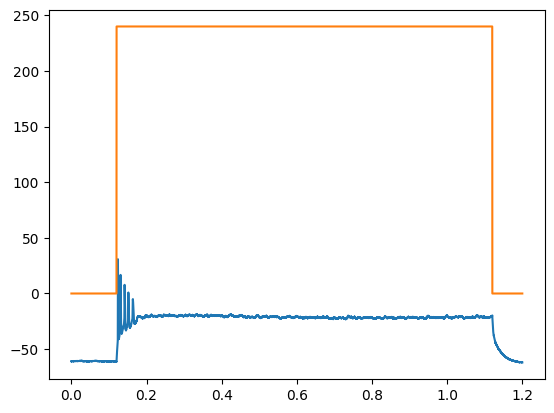

In [8]:
time, voltage, current, curr_applied = get_time_voltage_current_currindex0_gouwens(V1[5])
plt.plot(time, voltage)
plt.plot(time, current)
curr_applied

In [13]:
All_Cells_Features_ = cell_features_Gouwens(V1, V1_names, ephys_features[:-4]+['Current'], liquid_junction_potential=14)

Extracting ephys properties cell by cell:

 0
....................................................................................................
 100
....................................................................................................
 200
....................................................................................................
 300
....................................................................................................
 400
....................................................................................................
 500
....................................................................................................
 600
....................................................................................................
 700
....................................................................................................
 800
....................................................................................................
 900


In [14]:
All_Cells_Features_

,name sample,$V_{m}$ mean,$V_{m}$ skewness,$V_{m}$ std,3rd AHP,3rd AP amplitude,3rd AP threshold,3rd AP width,AHP,AP CV,...,AP count 1st half,AP count 1st quarter,AP count 2nd half,AP threshold,AP width,Current,ISI CV,ISI adapt,latency,rest $V_{m}$ mean
0,../data/Gouwens (2020)/raw_data/000020/sub-645...,-53.792477,1.843890,160.576614,-24.593750,48.187500,-42.875000,0.340006,-16.468750,-2.751177,...,3.988984,3.401197,3.912023,-53.093750,0.340006,480.0,-2.060089,0.352667,3.261249,-81.417488
0,../data/Gouwens (2020)/raw_data/000020/sub-645...,-54.923519,2.437261,183.109543,-21.093750,58.343750,-47.375000,0.300005,-18.531250,-3.034720,...,4.204693,3.555348,4.143135,-51.562500,0.280005,400.0,-2.459978,0.151806,3.252778,-79.836044
0,../data/Gouwens (2020)/raw_data/000020/sub-650...,-62.534771,1.968129,144.105026,-17.312500,48.718750,-57.000000,0.420007,-16.000000,-3.305940,...,3.912023,3.295837,3.806662,-59.593750,0.400007,300.0,-2.185712,0.076961,3.298873,-89.854729
0,../data/Gouwens (2020)/raw_data/000020/sub-737...,-60.871185,9.893783,7.989947,NaN,NaN,NaN,NaN,-15.356255,-3.139079,...,1.609438,1.609438,1.098612,-59.912498,0.380006,180.0,NaN,NaN,2.809519,-83.810707
0,../data/Gouwens (2020)/raw_data/000020/sub-737...,-51.528084,3.956052,41.744732,-11.443752,49.981248,-48.131248,0.460008,-11.112499,-3.059940,...,2.833213,2.397895,2.564949,-51.799999,0.440007,150.0,-1.404416,-0.049025,2.959171,-79.567116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,../data/Gouwens (2020)/raw_data/000020/sub-710...,-34.880226,0.290165,103.359421,-5.562500,37.093750,-34.875000,1.140019,-1.937500,-2.567005,...,3.044522,2.772589,2.890372,-43.500000,0.720012,280.0,-0.318521,-0.147683,3.268127,-70.297752
0,../data/Gouwens (2020)/raw_data/000020/sub-710...,-48.071892,1.279349,114.912773,-7.406250,39.187500,-44.031250,1.180020,-9.187500,-3.340730,...,3.044522,2.564949,2.944439,-43.281250,0.820014,220.0,-1.813710,0.212407,3.677877,-80.647766
0,../data/Gouwens (2020)/raw_data/000020/sub-682...,-52.697250,3.841458,131.454575,-13.906250,65.312500,-44.500000,0.640011,-9.062500,-3.588521,...,3.091042,2.564949,2.995732,-48.968750,0.540009,280.0,-2.051478,0.178093,3.276469,-72.764755
0,../data/Gouwens (2020)/raw_data/000020/sub-670...,-53.075626,-5.295933,32.959236,NaN,NaN,NaN,NaN,-12.875000,NaN,...,1.386294,1.386294,1.098612,-61.812500,0.320005,240.0,NaN,NaN,3.325832,-83.010910


Nans left:

In [19]:
sum(np.isnan(All_Cells_Features_.iloc[:,1:].values.sum(axis=1)))

196

But some have a different description, yet have voltage responses to squared pulses:

In [16]:
df = V1[-2].sweep_table.to_dataframe()

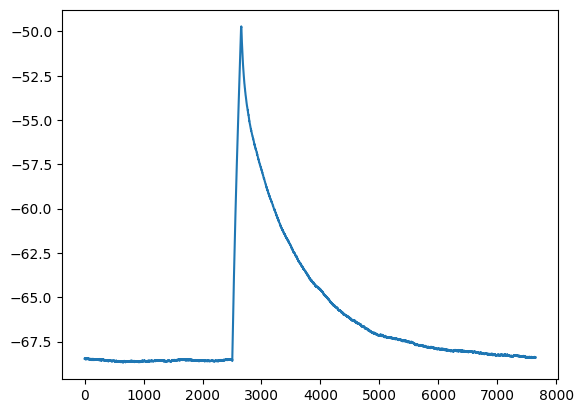

In [64]:
plt.plot(df['series'][52][0].data[:])

In [65]:
df['series'][53][0]

Data type,float32
Shape,()
Array size,4.00 bytes
Data type,float32
Shape,()
Array size,4.00 bytes
Data type,float32
Shape,()
Array size,4.00 bytes
Data type,float32
Shape,"(7650,)"


What are the cells's names ? Because we would like to link them to genes at some point :)

In [145]:
import sys
sys.path.append('../data/Gouwens (2020)/')

In [147]:
from dataset import load_bioarxiv_dataset,partitions, Datagen

/Users/yvesbernaerts/Documents/PhD/hh_sbi/hh_sbi_env/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [150]:
D = load_bioarxiv_dataset('../data/gouwens (2020)/')
XT = D['T_dat']
XE = D['E_pcipfx']
T_dim = XT.shape[1]
E_dim = XE.shape[1]

In [162]:
D.keys()

dict_keys(['__header__', '__version__', '__globals__', 'T_dat', 'T_spec_id_label', 'T_ispaired', 'gene_id', 'cluster', 'cluster_id', 'cluster_color', 'sample_id', 'map_conf', 'E_pc_zscored', 'E_pc_scaled', 'E_feature', 'E_spec_id_label', 'E_ispaired', 'pc_name', 'feature_name', 'feature_mean', 'feature_std', 'E_pcipfx', 'pcipfx_names'])

Can we link these: ?

In [253]:
D['sample_id'][:5]

array(['P8S4_170706_354_A01', 'P2S4_170710_052_A01',
       'P2S4_170710_053_A01', 'P2S4_170710_054_A01',
       'P2S4_170710_055_A01'], dtype=object)

In [16]:
All_Cells_Features = cell_features(M1, M1_names, ephys_features, start=0.10009)

WARNING    /Users/yvesbernaerts/Documents/PhD/hh_sbi/code/ephys_utils.py:62: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  voltage[:, curr_index_0] = df.iloc[curr_index_0*2][0][0].data[:]    # Find voltage trace for 0 current stimulation
 [py.warnings]


Extracting ephys properties cell by cell:
..

WARNING    /Users/yvesbernaerts/Documents/PhD/hh_sbi/code/ephys_utils.py:62: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  voltage[:, curr_index_0] = df.iloc[curr_index_0*2][0][0].data[:]    # Find voltage trace for 0 current stimulation
 [py.warnings]
WARNING    /Users/yvesbernaerts/Documents/PhD/hh_sbi/code/ephys_utils.py:62: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  voltage[:, curr_index_0] = df.iloc[curr_index_0*2][0][0].data[:]    # Find voltage trace for 0 current stimulation
 [py.warnings]


.

#### Save Scala:

In [ ]:
cells_w_ephys=['{}{}{}'.format(g.split('cell')[-1].split('-')[1], '_sample_', g.split('cell')[-1].split('-')[3].split('_')[0])
                   for g in All_Cells_Features['name sample']]
All_Cells_Features['cell id']=cells_w_ephys
All_Cells_Features=All_Cells_Features.set_index('cell id')
All_Cells_Features=All_Cells_Features.drop('name sample', axis=1)
All_Cells_Features=All_Cells_Features[ephys_features]
ind=~np.isnan(np.sum(All_Cells_Features.values, axis=1)) # Exclude Nan ephys feature neurons in the dataset
All_Cells_Features = All_Cells_Features.loc[ind, :]
M1_names=list(np.array(M1_names)[ind])

In [ ]:
M1_25degree={'exclude':ind, 'M1_names':M1_names, 'X_o': All_Cells_Features}
pickle.dump(M1_25degree, open('pickles/M1_features_.pickle', 'wb'))

#### Save Gouwens:

In [15]:
All_Cells_Features=All_Cells_Features_.copy()

In [16]:
cells_w_ephys=[g.split('ses')[-1].split('-')[1].split('_')[0] for g in All_Cells_Features['name sample']]
All_Cells_Features['cell id']=cells_w_ephys
All_Cells_Features=All_Cells_Features.set_index('cell id')
All_Cells_Features=All_Cells_Features.drop('name sample', axis=1)
All_Cells_Features=All_Cells_Features[ephys_features[:-4]+['Current']]
ind=~np.isnan(np.sum(All_Cells_Features.values, axis=1)) # Exclude Nan ephys feature neurons in the dataset
All_Cells_Features = All_Cells_Features.loc[ind, :]
V1_names=list(np.array(V1_names)[ind])

In [17]:
All_Cells_Features

,AP threshold,AP amplitude,AP width,AHP,3rd AP threshold,3rd AP amplitude,3rd AP width,3rd AHP,AP count,AP count 1st 8th,...,AP average amp adapt,AP CV,ISI adapt,ISI CV,latency,rest $V_{m}$ mean,$V_{m}$ mean,$V_{m}$ std,$V_{m}$ skewness,Current
cell id,,,,,,,,,,,,,,,,,,,,,
645441106,-53.093750,62.093750,0.340006,-16.468750,-42.875000,48.187500,0.340006,-24.593750,4.615121,2.772589,...,0.482834,-2.751177,0.352667,-2.060089,3.261249,-81.417488,-53.792477,160.576614,1.843890,480.0
645436619,-51.562500,65.468750,0.280005,-18.531250,-47.375000,58.343750,0.300005,-21.093750,4.844187,2.890372,...,0.485124,-3.034720,0.151806,-2.459978,3.252778,-79.836044,-54.923519,183.109543,2.437261,400.0
651145519,-59.593750,51.218750,0.400007,-16.000000,-57.000000,48.718750,0.420007,-17.312500,4.521789,2.639057,...,0.488846,-3.305940,0.076961,-2.185712,3.298873,-89.854729,-62.534771,144.105026,1.968129,300.0
741277063,-51.799999,52.799999,0.440007,-11.112499,-48.131248,49.981248,0.460008,-11.443752,3.295837,2.079442,...,0.426815,-3.059940,-0.049025,-1.404416,2.959171,-79.567116,-51.528084,41.744732,3.956052,150.0
741230065,-43.256248,58.649998,0.400007,-14.400002,-36.356247,51.712496,0.420007,-17.150002,1.791759,1.791759,...,0.046370,-2.938385,0.567632,-1.285786,2.857731,-70.924309,-42.626209,9.699920,2.118063,220.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646431623,-59.875000,78.625000,0.520009,-16.531250,-57.531250,74.468750,0.580010,-15.875000,3.295837,1.791759,...,0.411029,-3.017326,0.170277,-1.919754,3.857407,-81.567238,-63.560570,102.284103,4.091834,210.0
711577747,-43.500000,44.593750,0.720012,-1.937500,-34.875000,37.093750,1.140019,-5.562500,3.583519,2.302585,...,0.470586,-2.567005,-0.147683,-0.318521,3.268127,-70.297752,-34.880226,103.359421,0.290165,280.0
711572438,-43.281250,37.468750,0.820014,-9.187500,-44.031250,39.187500,1.180020,-7.406250,3.610918,2.079442,...,0.474132,-3.340730,0.212407,-1.813710,3.677877,-80.647766,-48.071892,114.912773,1.279349,220.0


In [18]:
V1_25degree={'exclude':ind, 'V1_names':V1_names, 'X_o': All_Cells_Features}
pickle.dump(V1_25degree, open('pickles/V1_features.pickle', 'wb'))